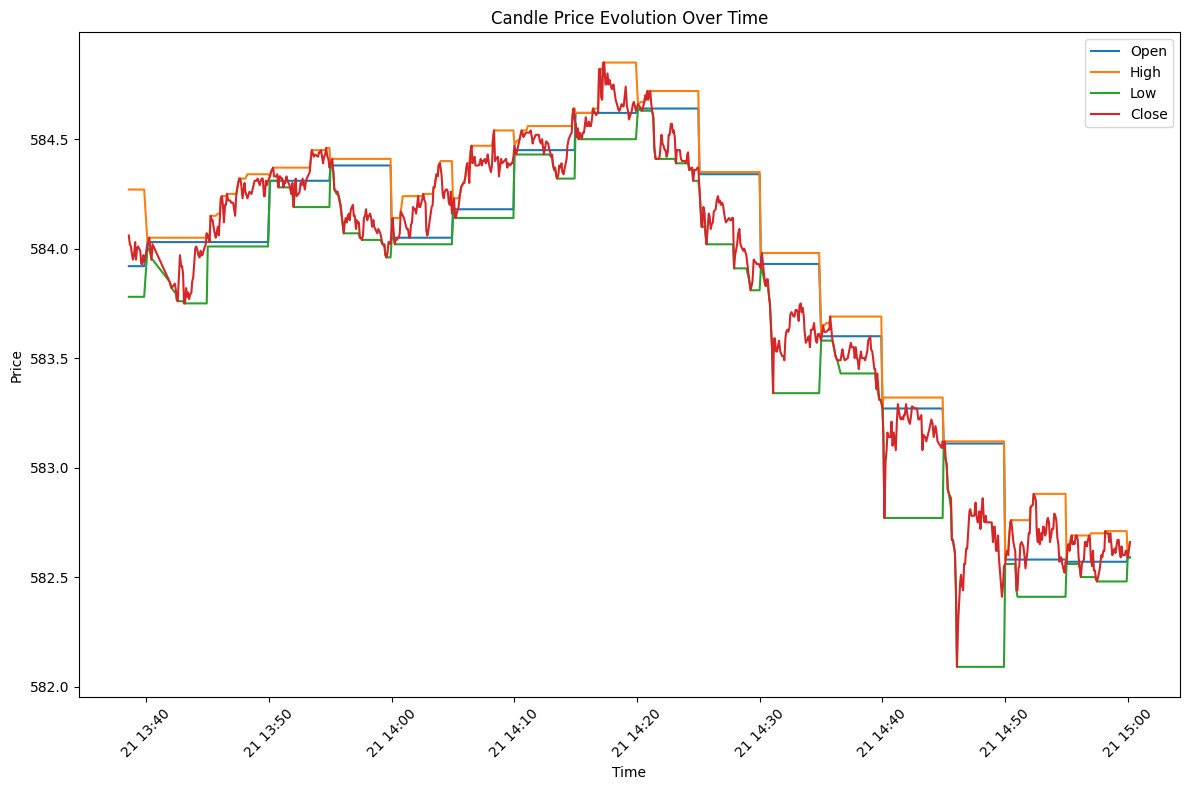

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

# Define column names
columns = ['now', 'candle_start', 'candle_end', 'candle_age', 'candle_remaining', 'open', 'high', 'low', 'close', 'volume']

# Load the CSV file
df = pd.read_csv('../output/AMEX:SPY-regular-5-candle.csv', header=None, names=columns)

# Convert 'now' and 'candle_start' columns to datetime
df['now'] = pd.to_datetime(df['now'], unit='s')

# Plot the evolution of 'open', 'high', 'low', and 'close' over time for a selected period
plt.figure(figsize=(12, 8))
sns.lineplot(x=df['now'], y=df['open'], label='Open')
sns.lineplot(x=df['now'], y=df['high'], label='High')
sns.lineplot(x=df['now'], y=df['low'], label='Low')
sns.lineplot(x=df['now'], y=df['close'], label='Close')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Candle Price Evolution Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

